In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

In [2]:
import math
import random
import pickle
import itertools

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, label_ranking_average_precision_score, label_ranking_loss, coverage_error 

from sklearn.utils import shuffle

from scipy.signal import resample

import matplotlib.pyplot as plt

np.random.seed(42)

import pickle
from sklearn.preprocessing import OneHotEncoder








import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
import math
import random
import pickle
import itertools
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
np.random.seed(42)
import tensorflow as tf
import tensorflow.keras as keras

from keras.models import Model
from keras.layers import Input, Dense, Conv1D, MaxPooling1D, Softmax, Add, Flatten, Activation# , Dropout
from keras import backend as K
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler, ModelCheckpoint


Using TensorFlow backend.


1.  # DATA ACQUISITION *

In [3]:
test = pd.read_csv("C:/Users/nisch/Desktop/ECG Categorization\DATASET\mitbih_test.csv", header=None);
train = pd.read_csv("C:/Users/nisch/Desktop/ECG Categorization\DATASET\mitbih_train.csv", header=None);
mit_train_data = train
mit_test_data = test

# PRODUCE BALANCED DATASET train_df , test_df *

In [4]:
# There is a huge difference in the balanced of the classes.
# Better choose the resample technique more than the class weights for the algorithms.
from sklearn.utils import resample

df_1=mit_train_data[mit_train_data[187]==1]
df_2=mit_train_data[mit_train_data[187]==2]
df_3=mit_train_data[mit_train_data[187]==3]
df_4=mit_train_data[mit_train_data[187]==4]
df_0=(mit_train_data[mit_train_data[187]==0]).sample(n=20000,random_state=42)

df_1_upsample=resample(df_1,replace=True,n_samples=20000,random_state=123)
df_2_upsample=resample(df_2,replace=True,n_samples=20000,random_state=124)
df_3_upsample=resample(df_3,replace=True,n_samples=20000,random_state=125)
df_4_upsample=resample(df_4,replace=True,n_samples=20000,random_state=126)

train_df=pd.concat([df_0,df_1_upsample,df_2_upsample,df_3_upsample,df_4_upsample])


df_11=mit_test_data[mit_train_data[187]==1]
df_22=mit_test_data[mit_train_data[187]==2]
df_33=mit_test_data[mit_train_data[187]==3]
df_44=mit_test_data[mit_train_data[187]==4]
df_00=(mit_test_data[mit_train_data[187]==0]).sample(n=20000,random_state=42)

df_11_upsample=resample(df_1,replace=True,n_samples=20000,random_state=123)
df_22_upsample=resample(df_2,replace=True,n_samples=20000,random_state=124)
df_33_upsample=resample(df_3,replace=True,n_samples=20000,random_state=125)
df_44_upsample=resample(df_4,replace=True,n_samples=20000,random_state=126)

test_df=pd.concat([df_00,df_11_upsample,df_22_upsample,df_33_upsample,df_44_upsample])


equilibre=train_df[187].value_counts()
print(equilibre)

1.0    20000
3.0    20000
4.0    20000
2.0    20000
0.0    20000
Name: 187, dtype: int64


C:\Users\nisch\anaconda3\envs\PythonGPU\lib\site-packages\ipykernel_launcher.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
C:\Users\nisch\anaconda3\envs\PythonGPU\lib\site-packages\ipykernel_launcher.py:20: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
C:\Users\nisch\anaconda3\envs\PythonGPU\lib\site-packages\ipykernel_launcher.py:21: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
C:\Users\nisch\anaconda3\envs\PythonGPU\lib\site-packages\ipykernel_launcher.py:22: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
C:\Users\nisch\anaconda3\envs\PythonGPU\lib\site-packages\ipykernel_launcher.py:23: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


In [5]:
print("ALL Train data")
print("Type\tCount")
print((mit_train_data[187]).value_counts())
print("-------------------------")
print("ALL Test data")
print("Type\tCount")
print((mit_test_data[187]).value_counts())

print("ALL Balanced Train data")
print("Type\tCount")
print((train_df[187]).value_counts())
print("-------------------------")
print("ALL Balanced Test data")
print("Type\tCount")
print((train_df[187]).value_counts())

ALL Train data
Type	Count
0.0    72471
4.0     6431
2.0     5788
1.0     2223
3.0      641
Name: 187, dtype: int64
-------------------------
ALL Test data
Type	Count
0.0    18118
4.0     1608
2.0     1448
1.0      556
3.0      162
Name: 187, dtype: int64
ALL Balanced Train data
Type	Count
1.0    20000
3.0    20000
4.0    20000
2.0    20000
0.0    20000
Name: 187, dtype: int64
-------------------------
ALL Balanced Test data
Type	Count
1.0    20000
3.0    20000
4.0    20000
2.0    20000
0.0    20000
Name: 187, dtype: int64


# ONE HOT Encoding *

In [6]:
#One hot encoding for categorical target
#Since we will be using neural networks for our classification model, 
#our output classes need to be turned into a numerical representation. We use one hot encoding (from sklearn package) to do this.



#train_target = mit_train_data[187]
#train_target = train_target.values.reshape(87554,1)
train_target = train_df[187]
train_target = train_target.values.reshape(100000,1)




#one hot encode train_target

from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing
# TODO: create a OneHotEncoder object, and fit it to all of X

# 1. INSTANTIATE
enc = preprocessing.OneHotEncoder()

# 2. FIT
enc.fit(train_target)

# 3. Transform
onehotlabels = enc.transform(train_target).toarray()
onehotlabels.shape

target = onehotlabels

In [7]:
#remove ground truth labels from training df
#train/test split


from sklearn.model_selection import train_test_split

#X = mit_train_data
X = train_df
X = X.drop(axis=1,columns=187)

X_train, X_valid, Y_train, Y_valid = train_test_split(X,target, test_size = 0.25, random_state = 36)
X_train = np.asarray(X_train)
X_valid = np.asarray(X_valid)
Y_train = np.asarray(Y_train)
Y_valid = np.asarray(Y_valid)

#X_train.reshape((1, 2403, 187))
X_train = np.expand_dims(X_train, axis=2)
X_valid = np.expand_dims(X_valid, axis=2)
print(X_train.shape)
print(Y_train.shape)
# 2,403 training heartbeats and 802 validation heartbeats 
# for a 75:25 train-test split. 

(75000, 187, 1)
(75000, 5)


# 1 MODEL NN

In [8]:
# MODEL 1 https://www.kaggle.com/freddycoder/heartbeat-categorization
# Separate features and targets

from keras.utils import to_categorical

print("--- X ---")
# X = mit_train_data.loc[:, mit_train_data.columns != 187]
X = train_df.loc[:, mit_train_data.columns != 187]
print(X.head())
print(X.info())

print("--- Y ---")
# y = mit_train_data.loc[:, mit_train_data.columns == 187]
y = train_df.loc[:, mit_train_data.columns == 187]
y = to_categorical(y)

print("--- testX ---")
#testX = mit_test_data.loc[:, mit_test_data.columns != 187]
testX = test_df.loc[:, mit_test_data.columns != 187]
print(testX.head())
print(testX.info())

print("--- testy ---")
#testy = mit_test_data.loc[:, mit_test_data.columns == 187]
testy = test_df.loc[:, mit_test_data.columns == 187]
testy = to_categorical(testy)

--- X ---
            0         1         2         3         4         5         6    \
10153  0.162791  0.540698  0.755814  0.186047  0.168605  0.546512  0.616279   
33886  0.990066  0.938742  0.344371  0.034768  0.273179  0.331126  0.326159   
32005  0.974239  0.932084  0.590164  0.131148  0.014052  0.168618  0.238876   
56159  0.978495  0.723118  0.526882  0.298387  0.220430  0.158602  0.091398   
61783  0.963351  0.709424  0.060209  0.013089  0.057592  0.041885  0.047120   

            7         8         9    ...  177  178  179  180  181  182  183  \
10153  0.697674  0.651163  0.703488  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
33886  0.341060  0.347682  0.347682  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
32005  0.210773  0.196721  0.208431  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
56159  0.091398  0.080645  0.083333  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
61783  0.034031  0.039267  0.044503  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

       184  185  186  
10153  0.0  0.0  

In [9]:
# Keras model to make prediction

#The number of epochs is a hyperparameter that defines the number times that the learning algorithm will work through the entire training dataset.
#The batch size is a hyperparameter that defines the number of samples to work through before updating the internal model parameters.
# softmax is used to categorize 
from keras.callbacks import History 
from keras.models import Sequential
from keras.layers import Dense, Activation
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='accuracy', min_delta=0, patience=1, mode='max', baseline=None, restore_best_weights=False)
model = Sequential()

model.add(Dense(50, activation='relu', input_shape=(187,)))
model.add(Dense(50, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(5, activation='softmax'))

model.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X, y, epochs=15,verbose=1,callbacks=[early_stopping] )

## SAVE MODEL ##
# serialize model to JSON
model_json = model.to_json()
with open("NN.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("NN.h5")
print("Saved model to disk")

print("Evaluation: ")
mse, acc = model.evaluate(testX, testy)
print('mean_squared_error :', mse)
print('accuracy:', acc)

Epoch 1/15
100000/100000 [==============================] - 12s 119us/step - loss: 0.4447 - accuracy: 0.8346
Epoch 2/15
100000/100000 [==============================] - 11s 111us/step - loss: 0.2570 - accuracy: 0.9061
Epoch 3/15
100000/100000 [==============================] - 13s 126us/step - loss: 0.1985 - accuracy: 0.9279
Epoch 4/15
100000/100000 [==============================] - 12s 118us/step - loss: 0.1632 - accuracy: 0.9419
Epoch 5/15
100000/100000 [==============================] - 12s 120us/step - loss: 0.1403 - accuracy: 0.9510
Epoch 6/15
100000/100000 [==============================] - 12s 118us/step - loss: 0.1226 - accuracy: 0.9567
Epoch 7/15
100000/100000 [==============================] - 12s 116us/step - loss: 0.1118 - accuracy: 0.9615
Epoch 8/15
100000/100000 [==============================] - 11s 115us/step - loss: 0.1013 - accuracy: 0.9653
Epoch 9/15
100000/100000 [==============================] - 13s 126us/step - loss: 0.0915 - accuracy: 0.9682
Epoch 10/15
100000/

dict_keys(['loss', 'accuracy'])


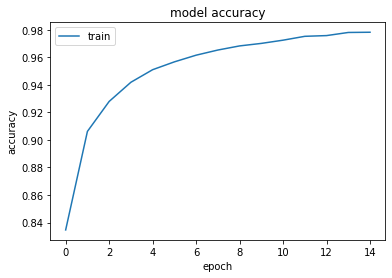

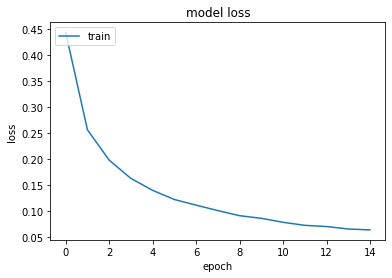

In [10]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
#plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# ARDUINO SAMPLES

In [16]:
test = pd.read_csv("C:/Users/nisch/Desktop/ECG Categorization/ARDUINO SAMPLES/Schetakis.txt", header=None)
test = test.iloc[0,0:len(test.T)-1] # Remove last line cause it might be a Nan
test = pd.DataFrame(test)
print(os.getcwd())

C:\Users\nisch\Desktop\ECG Categorization


## Normalize samples

In [13]:
test = pd.read_csv("C:/Users/nisch/Desktop/ECG Categorization/ARDUINO SAMPLES/Schetakis.txt", header=None)
test = test.iloc[0,0:len(test.T)-1] # Remove last line cause it might be a Nan
test = pd.DataFrame(test)
print(os.getcwd())
# NORMALIZING TEST DATA AMPLITUDE
from sklearn.preprocessing import MinMaxScaler
# load the dataset and print the first 5 rows
# prepare data for normalization
values = test.values
scaler = MinMaxScaler(feature_range=(0, 1))
scaler = scaler.fit(values)
normalized = scaler.transform(values)
normalized = pd.DataFrame(normalized)
normalized

C:\Users\nisch\Desktop\ECG Categorization


,0
0,0.653846
1,0.629808
2,0.673077
3,0.649038
4,0.634615
...,...
25196,0.841346
25197,0.860577
25198,0.831731
25199,0.812500


In [19]:
# NORMALIZING TEST DATA AMPLITUDE
from sklearn.preprocessing import MinMaxScaler
# load the dataset and print the first 5 rows
# prepare data for normalization
values = test.values
scaler = MinMaxScaler(feature_range=(0, 1))
scaler = scaler.fit(values)
normalized = scaler.transform(values)
normalized = pd.DataFrame(normalized.T)
normalized

,0,1,2,3,4,5,6,7,8,9,...,25191,25192,25193,25194,25195,25196,25197,25198,25199,25200
0,0.653846,0.629808,0.673077,0.649038,0.634615,0.663462,0.615385,0.677885,0.649038,0.649038,...,0.778846,0.8125,0.826923,0.831731,0.855769,0.841346,0.860577,0.831731,0.8125,0.802885


In [ ]:
## TESTING FOR ONE X
#x=0
#normalized = pd.DataFrame(normalized.T) ## CAUTION!!! needs to run only once 
#normtest=normalized.iloc[0, 0+x:187+x] 
#normtest=pd.DataFrame(normtest)
#category = model.predict_classes(normtest.T)
#category

In [20]:
category= pd.DataFrame()
category=category.dropna()
lst_seq = np.arange(0,len(normalized.T)-190)
for x in lst_seq:
    normtest=normalized.iloc[0, 0+x:187+x] 
    normtest=pd.DataFrame(normtest)
    category[x] = model.predict_classes(normtest.T)
category

,0,1,2,3,4,5,6,7,8,9,...,25001,25002,25003,25004,25005,25006,25007,25008,25009,25010
0,2,2,2,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1


## MEAN OF CATEGORIES

In [22]:
np.mean(category.T)

0    1.468354
dtype: float64

## PLOT OF CATEGORIES

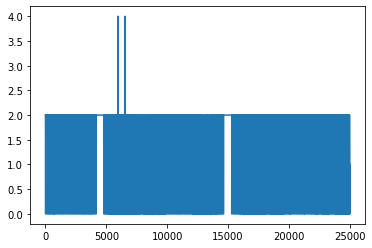

In [32]:
plt.plot(category.T.iloc[:,0])

## Display frequency of each predicted category as evaluated by model

In [23]:
category = pd.DataFrame(category)
temp1= category.iloc[0,:].value_counts()
print("Categories vs Value Count")
print(temp1)
print("Categories vs Frequency")
print(temp1/(len(category.T)))

Categories vs Value Count
2    17441
0     5751
1     1811
4        8
Name: 0, dtype: int64
Categories vs Frequency
2    0.697333
0    0.229939
1    0.072408
4    0.000320
Name: 0, dtype: float64


In [34]:
category = pd.DataFrame(category)
temp1= category.iloc[0,].value_counts()
print("Categories vs Value Count")
print(temp1)
print("Categories vs Frequency")
print(temp1/(len(category.T)))

Categories vs Value Count
2    1
Name: 0, dtype: int64
Categories vs Frequency
2    0.00004
Name: 0, dtype: float64
